

```
# This is formatted as code
```

# Participation - Week 12
## CSCI 4622 - 2024 Fall

### Exploring Neural Net construction, parameter tuning, etc.



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.metrics

import tensorflow

Note above that we are importing a different library - "tensorflow" - to use in constructing Neural Networks. This library (and the model of a Neural Network itself) builds on the mathematical foundations of a "Tensor" ([see wiki for details](https://en.wikipedia.org/wiki/Tensor)), hence the name. Since we aren't building them from scratch in this exercise, we don't need to worry about the specifics of the mathematics (i.e. how fitting is accomplished efficiently).

Now, we need to set up a dataset. We'll use the same "Half-Moons" structures we have used in previous participations, thanks to its non-linear decision boundary.

__STEP 0: Use the last 5 digits of your buffone card ID number as your random state seed in the following cell__

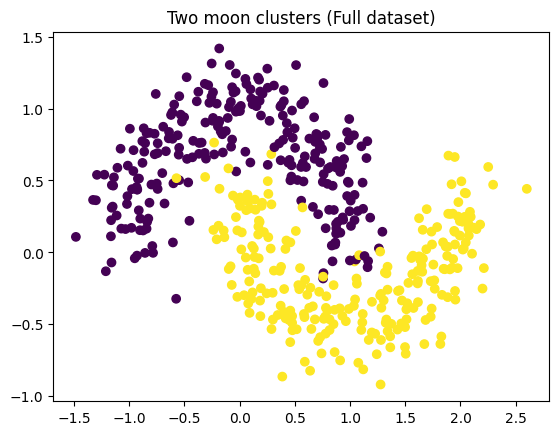

In [4]:
X, y = sklearn.datasets.make_moons(n_samples=500, noise=0.19, random_state=78578) #TODO: Change random_state to the last 5 digits of your BuffOne card
X_train, y_train = X[:350], y[:350]
X_test, y_test = X[350:], y[350:]
plt.title("Two moon clusters (Full dataset)")
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

We have data!

Now, let's set up the old decision surface visualizer we used in HW1 (and Participations 3 and 11).

In [5]:
def show_decision_surface(model):
    """
    Helper function to visualize the decision surface of model
    :param model: Initialized Classifier
    :return: None
    """
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    x_grid = np.arange(x_min, x_max, 0.1)
    y_grid = np.arange(y_min, y_max, 0.1)
    xx, yy = np.meshgrid(x_grid, y_grid)
    r1, r2 = xx.reshape(-1,1), yy.reshape(-1,1)
    grid = np.hstack((r1,r2))
    y_hat = model.predict(grid)
    zz = y_hat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='PiYG')
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

**Defining our Model**

Now, we need to build a model. I've written some starting code for a (decent) model to fit the half-moons, we'll start by breaking it apart and thinking about it.

In [6]:
model = tensorflow.keras.models.Sequential( [
    tensorflow.keras.layers.InputLayer(shape=(2,)),
    tensorflow.keras.layers.Dense(50, activation = "relu"),
    tensorflow.keras.layers.Dense(50, activation = "relu"),
    tensorflow.keras.layers.Dense(1, activation="sigmoid")
] )

Above, we see a few things happening.

 - The outer layer is a ["Sequential"](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential). This is an object that allows us to group Layer objects (see below) into one cohesive model.
 - Next, we have an ["Input"](https://www.tensorflow.org/api_docs/python/tf/keras/Input) layer object. This defines the parameters for what the Sequential object expects.
    - We pass in a shape of "(2,)" saying this model should expect vector inputs of length 2. For bigger / multidimensional data (e.g. an image), we would pass the size / shape of each sample.
 - Next, we have a series of ["Dense"](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layers. Each of these is one layer of fully connected (that is, Dense) nodes, with the argument of how many nodes to include in this layer.
    - We also include an argument for which activation function to use, in this case ReLU.
 - Our last layer (another Dense, for most purposes) defines the output layer, and needs to be set up to match the kind of problem we are solving.
    - In this case, we have a single binary outcome variable, so we use one node and give it a Sigmoid function to support the prediction.

**Building, Fitting, and Testing our Model**

Now we need to use this model we have defined.

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6297
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5151 
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4548 
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4177 
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3765  
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3302  
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3590 
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3176  
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2933  
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2724  
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2958  
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2883 
Epoch 13/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2946  
Epoch 14/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3145  
Epoch 15/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.29

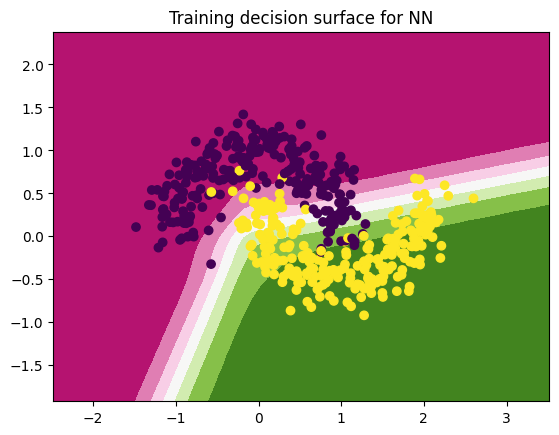

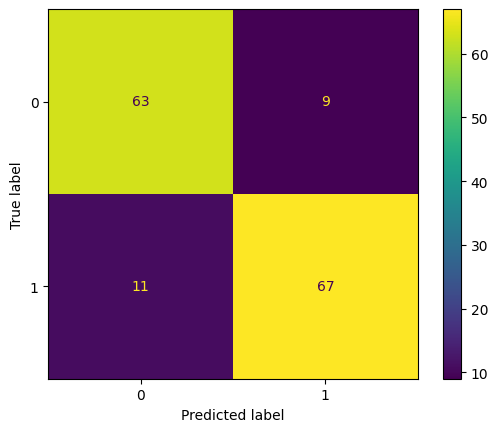

In [7]:
model.compile(loss="BinaryCrossentropy")

model.fit(X_train, y_train, epochs=20)
score = model.evaluate(X_test, y_test, verbose=0)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

plt.title("Training decision surface for NN")
show_decision_surface(model)
conf = sklearn.metrics.confusion_matrix(y_test, y_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf)
disp.plot()
plt.show()

Above we see a few components.
 - We run the ["compile"](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) function of the Sequential object. This step allows us to define the ways in which we define the "loss" of our model and other parameters we need.
     - Often we would also set one or more "metric" options for our model in order to internally report outcome measures like accuracy, F1, AUC, MSE, etc. as relevant to our needs. However, since we are using our decision boundary visualizer and an external (SKLearn) Confusion Matrix function.
 - We "fit" the Sequential object. This works just like the same argument in SKLearn, etc., following the parameters given in the "compile" step.
    - We do have to define an extra "epochs" variable. The model defaults to 1, which is much too small (as you will see below).
 - We "predict" using the Sequential object. Again, this behaves like other ML libraries.
    - Since we are actually using a Sigmoid activation function (which reports a probability), we can't directly report the results as 0 or 1. Instead, we transform these probability predictions into the raw outcome score integers (0 or 1) reflected in the true values with a True/False comparison, then a conversion.

  **1) How did our initial NN do when reviewing the confusion matrix? What does the decision boundary look like?**

The model did good initially with an accuracy of 87 percent. The decision bounday is looking decent however it underfits the data a bit as it does not count for some of the yellow points going in the boundary of the purple points.

**Exploring the hyperparameters of a Neural Network**

Using the cell below, explore changes to the different parameters of the model. Try exploring the following parameters:
 - Adding and removing hidden Dense layers from the model.
 - Increasing and decreasing the size (number of nodes) in each hidden layer in the model.
 - Changing the activation function of the hidden layers.
    - You could fiddle around with the output layer activation too, but that's not necessary for full credit. Doing an output other than a Sigmoid / Step / similar activation will also require changes in the prediction step...
 - Increasing and Decreasing the Epochs in the fit function call.

Epoch 1/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6483
Epoch 2/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5215 
Epoch 3/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3881 
Epoch 4/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3238 
Epoch 5/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3219 
Epoch 6/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2649 
Epoch 7/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2962 
Epoch 8/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2567 
Epoch 9/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2720 
Epoch 10/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2525 
Epoch 11/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2509 
Epoch 12/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2252 
Epoch 13/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2224  
Epoch 14/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2397
Epoch 15/45
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1974 
Epoch

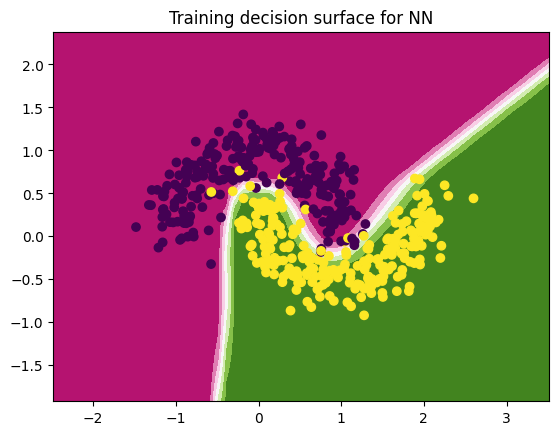

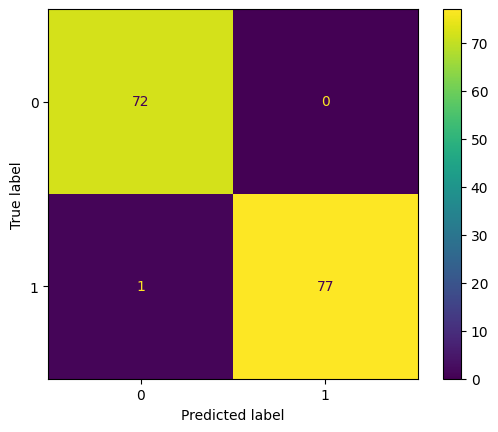

In [30]:
model = tensorflow.keras.models.Sequential( [
    tensorflow.keras.layers.InputLayer(shape=(2,)),
    tensorflow.keras.layers.Dense(70, activation = "relu"),
    tensorflow.keras.layers.Dense(70, activation = "relu"),
    tensorflow.keras.layers.Dense(70, activation = "relu"),
    tensorflow.keras.layers.Dense(1, activation="sigmoid")
] )

model.compile(loss="BinaryCrossentropy")

model.fit(X_train, y_train, epochs=45)
score = model.evaluate(X_test, y_test, verbose=0)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

plt.title("Training decision surface for NN")
show_decision_surface(model)
conf = sklearn.metrics.confusion_matrix(y_test, y_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(conf)
disp.plot()
plt.show()

**2) What were the reuslts of your experimentation? What was the best accuracy you could achieve, and what was the set of model parameters that achieved that accuracy? What made things worse?**

So, I added a bunch of hidden dense layers of type "relu" and for all of them, I added 70 layers to them except for sigmoid which I kept as 1.

I also increased the number of epochs to 45.

This all resulted in an accuracy of 99 percent.

What made things worse is adding more hidden dense layers, and adding more can lead to inaccuracies. Also, adding more hidden dense layers of type sigmoid will make things worse a lot and one is already enough.

Adding more than 45 epochs can also lead to inaccuracies.

Adding more layers can lead to inaccuracies if it is above a certain point, and that point I found out is 70.

The decision boundary is much better than before and much more smoother and it is not underfitting anymore like before since we added more hypermaters to our model.